#Probabilistic Supervised Learning - Naive Bayes(Multinomial): 
Create a dataset from the sample given to you(e.g. “Iris”, “Advertising” etc.). Perform the necessary pre-processing steps such as encoding. Train the model using Naive Bayes Classifier for Multinomial predictions. Give new test data and predict the classification output. Handcode the classification probability and compare with the model output. Print the confusion matrix, accuracy, precision, recall, sensitivity, specificity, MCC etc.  Analyze and write the inference. 

In [1]:
import pandas as pd

#Import dataset
df = pd.read_csv('Iris.csv')
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [2]:
df.drop(['Id',],inplace=False,axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Species']=lab.fit_transform(df['Species'])
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
#Train test split
x_train,x_test,y_train,y_test=train_test_split(df.drop(['Species'],axis=1),df['Species'],test_size=0.2,random_state=42)
model =MultinomialNB()
model.fit(x_train,y_train)
#Listing classes
model.classes_

array([0, 1, 2])

In [5]:
y_pred=model.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
acc =  accuracy_score(y_pred,y_test)
print("Accuracy : ",acc)

Accuracy :  0.9333333333333333


(30,)


<AxesSubplot:>

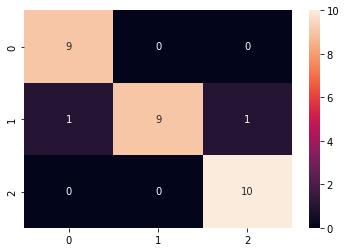

In [6]:
#Draw confusion matrix
print(y_test.shape)
labels = [0,1,2]
cm=confusion_matrix(y_pred,y_test,labels=labels)
import seaborn as sns
sns.heatmap(cm,annot=True)

In [7]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,matthews_corrcoef

print("\nAccuracy ",accuracy_score(y_test,y_pred))
print("\nRecall_score for individual classess [0 1 2]=",recall_score(y_test,y_pred,average=None))
print("\nPrecision_score for individual classess [0 1 2]=",precision_score(y_test,y_pred,average=None))
print("\nMCC=",matthews_corrcoef(y_test,y_pred))


Accuracy  0.9333333333333333

Recall_score for individual classess [0 1 2]= [0.9        1.         0.90909091]

Precision_score for individual classess [0 1 2]= [1.         0.81818182 1.        ]

MCC= 0.9046822742474916
